Было решено сделать более полную аналитику по первому заданию стажировки, так как планирую дальше развиваться именно в этом направлении. Более обширный анализ вакансий - это неплохой кейс для стажировки.

In [199]:
import time
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Скачаем данные вакансий по IT-направлениям с hh.ru.

In [200]:
start_time = time.time()

number_of_pages = 50
#number_of_ads = number_of_pages * per_page
job_title = ["'Data Analyst' or 'Data Science' or'Data Engineer', not 'head', not 'директор', not 'director', not 'главный', not 'старший', not 'глава', not 'юрист', not 'менеджер', not 'продаж', not 'тестировщик', not 'DevOps', not 'старший специалист'"]
for job in job_title:
    data=[]
    for i in range(number_of_pages):
        url = 'https://api.hh.ru/vacancies'
        par = {'text': job, 'area':['66', '1', '2'],'per_page':'10', 'page':i, 'only_with_salary':True}
        r = requests.get(url, params=par)
        e=r.json()
        data.append(e)
        vacancy_details = data[0]['items'][0].keys()
        df = pd.DataFrame(columns= list(vacancy_details))
        ind = 0
        for i in range(len(data)):
            for j in range(len(data[i]['items'])):
                df.loc[ind] = data[i]['items'][j]
                ind+=1
    #csv_name = "hh_base.csv"
    #df.to_csv(csv_name)

print(f"--- {(time.time() - start_time)/60} minutes ---")

--- 0.6276276032129924 minutes ---


In [201]:
hh_base = df
hh_base

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,working_time_intervals,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes,experience,employment,adv_response_url,is_adv_vacancy,adv_context
0,108463178,False,Аналитик данных (стажёр),None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 50000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Санкт-Петербург', 'street': 'Пулковс...",...,[],[],False,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'probation', 'name': 'Стажировка'}",None,False,None
1,108459278,False,"Аналитик данных (SQL, Excel)",None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 130000, 'to': 170000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",...,[],[],False,"[{'id': '10', 'name': 'Аналитик'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",None,False,None
2,108232710,False,Data аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 120000, 'to': 180000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Малый Конюшковск...",...,[],[],True,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",None,False,None
3,108203863,False,Аналитик данных (middle),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 250000, 'to': 420000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",None,...,[],[],False,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",None,False,None
4,108447332,False,QA специалист (финтех),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 200000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,...,[],[],False,"[{'id': '124', 'name': 'Тестировщик'}]",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",None,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,103340275,False,ДБА PostgreSQL / DBA,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 350000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,...,[],[],False,"[{'id': '114', 'name': 'Системный инженер'}]",False,"{'id': 'moreThan6', 'name': 'Более 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",None,False,None
349,103341474,False,Руководитель группы администраторов баз данных...,None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 350000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,...,[],[],False,"[{'id': '114', 'name': 'Системный инженер'}]",False,"{'id': 'moreThan6', 'name': 'Более 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",None,False,None
350,105733051,False,Менеджер по продажам (со знанием казахского яз...,None,False,False,"{'id': '88', 'name': 'Казань', 'url': 'https:/...","{'from': 150000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Санкт-Петербург', 'street': 'Граждан...",...,[],[],False,"[{'id': '70', 'name': 'Менеджер по продажам, м...",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",None,False,None
351,107642456,False,Трафик-менеджер - стажёр,"{'id': 'hh-1455-product', 'name': 'HeadHunter:...",True,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 19000, 'to': 38000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица Годовикова...",...,"[{'id': 'from_four_to_six_ho

Убираем из датасета вакансии, в которых не встречаются названия ['Data Science', 'Data Analyst', 'Data Engineer', 'Data', 'Аналитик']

In [202]:
title  = ['Data Science', 'Data Analyst', 'Data Engineer', 'Data', 'Аналитик']
vacancy = []
for i in range (0, len(hh_base['name'])):
    count = 0
    for j in title:
        if j in hh_base['name'][i]:
            count += 1
    if count > 0:
        vacancy.append(hh_base['name'][i])

In [203]:
indexes = []
for i in range (0, len(hh_base['name'])):
    if not(hh_base.values[i][2] in vacancy):
        indexes.append(i)

In [204]:
hh_base = hh_base.drop(index = indexes)

In [205]:
hh_base = hh_base.reset_index()

Анализируем количество вакансий в зависимости от требуемого опыта работы

In [206]:
experience_range = {}
for vacancy in hh_base.values:
    experience = ['noExperience', 'between1And3', 'between3And6', 'moreThan6']
    for j in experience:
        if vacancy[-5]['id'] == j:
            if j in experience_range:
                experience_range[j] += 1
            else:
                experience_range[j] = 1
print(experience_range)
   



{'noExperience': 8, 'between1And3': 56, 'between3And6': 41}


Считаем зарплату по каждой вакансии

In [208]:
hh_salary = []
for i in range (len(hh_base['salary'])):
    if hh_base['salary'][i]['from'] is None:
        low_bound = 0
    else:
        low_bound = int(hh_base['salary'][i]['from'])
    if hh_base['salary'][i]['to'] is None:
        upper_bound = 0
    else:
        upper_bound = int(hh_base['salary'][i]['to'])
    if low_bound == 0:
        salary = upper_bound
    if upper_bound == 0:
        salary = low_bound
    if upper_bound*low_bound != 0:
        salary = (upper_bound+low_bound)/2
    hh_salary.append(salary)

In [209]:
hh_base['numeric_salary'] = hh_salary

In [210]:
hh_experience = []
for i in range (len(hh_base['experience'])):
    hh_experience.append(hh_base['experience'][i]['id'])
hh_base['emp_experience'] = hh_experience

In [211]:
hh_base = hh_base.drop('salary', axis = 1)
hh_base = hh_base.drop('experience', axis = 1)

In [212]:
hh_base

,index,id,premium,name,department,has_test,response_letter_required,area,type,address,...,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes,employment,adv_response_url,is_adv_vacancy,adv_context,numeric_salary,emp_experience
0,0,108463178,False,Аналитик данных (стажёр),None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Санкт-Петербург', 'street': 'Пулковс...",...,[],False,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,"{'id': 'probation', 'name': 'Стажировка'}",None,False,None,50000.0,noExperience
1,1,108459278,False,"Аналитик данных (SQL, Excel)",None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",...,[],False,"[{'id': '10', 'name': 'Аналитик'}]",False,"{'id': 'full', 'name': 'Полная занятость'}",None,False,None,150000.0,between1And3
2,2,108232710,False,Data аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Малый Конюшковск...",...,[],True,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,"{'id': 'full', 'name': 'Полная занятость'}",None,False,None,150000.0,between1And3
3,3,108203863,False,Аналитик данных (middle),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}",None,...,[],False,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,"{'id': 'full', 'name': 'Полная занятость'}",None,False,None,335000.0,between1And3
4,5,108431720,False,Data Scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",...,[],False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'full', 'name': 'Полная занятость'}",None,False,None,80000.0,noExperience
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,316,103981333,False,Аналитик рекламных кампаний,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Ленинградский пр...",...,[],False,"[{'id': '10', 'name': 'Аналитик'}]",False,"{'id': 'full', 'name': 'Полная занятость'}",None,False,None,150000.0,between1And3
101,320,107028794,False,NLP Data Scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}",None,...,[],False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'full', 'name': 'Полная занятость'}",None,False,None,450000.0,between3And6
102,336,108193400,False,DataOps Team Lead,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",...,[],False,"[{'id': '104', 'name': 'Руководитель группы ра...",False,"{'id': 'full', 'name': 'Полная занятость'}",None,False,None,300000.0,between3And6
103,338,107420882,False,Аналитик данных,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Дербеневская наб...",...,[],False,"[{'id': '163', 'name': 'Маркетолог-аналитик'}]",False,"{'id': 'full', 'name': 'Полная занятость'}",None,False,None,80000.0,between3And6


Вычисляем среднюю зарплату в зависимости от опыта работы

In [213]:
hh_base.groupby(['emp_experience'])['numeric_salary'].mean()

emp_experience
between1And3    151440.178571
between3And6    268223.170732
noExperience     77112.500000
Name: numeric_salary, dtype: float64

In [214]:
city_id = []
city = []
for i in range (len(hh_base['area'])):
    city_id.append(hh_base['area'][i]['id'])
    city.append(hh_base['area'][i]['name'])
hh_base['city_id'] = city_id
hh_base['city'] = city

Считаем количество вакансий в Нижнем Новгороде, Санкт-Петербурге и Москве

In [215]:
hh_base.groupby(['city'])['id'].count()

city
Москва             89
Нижний Новгород     4
Санкт-Петербург    12
Name: id, dtype: int64

In [216]:
employment = []
for i in range (len(hh_base['employment'])):
    employment.append(hh_base['employment'][i]['name'])
hh_base['employment_type'] = employment
hh_base = hh_base.drop('employment', axis = 1)

In [217]:
hh_base

,index,id,premium,name,department,has_test,response_letter_required,area,type,address,...,professional_roles,accept_incomplete_resumes,adv_response_url,is_adv_vacancy,adv_context,numeric_salary,emp_experience,city_id,city,employment_type
0,0,108463178,False,Аналитик данных (стажёр),None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Санкт-Петербург', 'street': 'Пулковс...",...,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,None,False,None,50000.0,noExperience,2,Санкт-Петербург,Стажировка
1,1,108459278,False,"Аналитик данных (SQL, Excel)",None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",...,"[{'id': '10', 'name': 'Аналитик'}]",False,None,False,None,150000.0,between1And3,1,Москва,Полная занятость
2,2,108232710,False,Data аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Малый Конюшковск...",...,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,None,False,None,150000.0,between1And3,1,Москва,Полная занятость
3,3,108203863,False,Аналитик данных (middle),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}",None,...,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,None,False,None,335000.0,between1And3,1,Москва,Полная занятость
4,5,108431720,False,Data Scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",...,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,None,False,None,80000.0,noExperience,1,Москва,Полная занятость
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,316,103981333,False,Аналитик рекламных кампаний,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Ленинградский пр...",...,"[{'id': '10', 'name': 'Аналитик'}]",False,None,False,None,150000.0,between1And3,1,Москва,Полная занятость
101,320,107028794,False,NLP Data Scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}",None,...,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,None,False,None,450000.0,between3And6,1,Москва,Полная занятость
102,336,108193400,False,DataOps Team Lead,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",...,"[{'id': '104', 'name': 'Руководитель группы ра...",False,None,False,None,300000.0,between3And6,1,Москва,Полная занятость
103,338,107420882,False,Аналитик данных,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Дербеневская наб...",...,"[{'id': '163', 'name': 'Маркетолог-аналитик'}]",False,None,False,None,80000.0,between3And6,1,Москва,Полная занятость


Считаем количество вакансий в зависимости от занятости

In [218]:
hh_base.groupby(['employment_type'])['id'].count()

employment_type
Полная занятость    101
Стажировка            4
Name: id, dtype: int64

In [219]:
url = []
for i in range (len(hh_base['area'])):
    url.append(hh_base['area'][i]['url'])
hh_base['url'] = url
hh_base = hh_base.drop('area', axis = 1)

Построим круговую диаграмму, на которой посмотрим, какую долю занимают вакансии с определенным грейдом

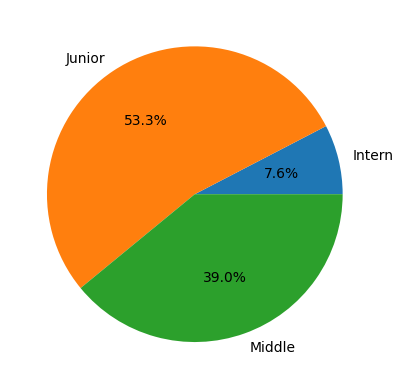

In [227]:
exp_dict = {'between1And3': 'Junior', 'noExperience': 'Intern', 'between3And6': 'Middle'}
labels = [exp_dict[i] for i in experience_range.keys()]
sizes = experience_range.values()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

Построим круговую диаграмму, на которой отметим долю вакансий в Нижнем Новгороде, Москве и Санкт-Петербурге

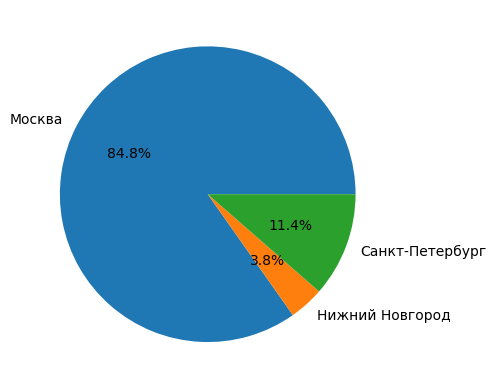

In [225]:

labels = hh_base.groupby(['city'])['id'].count().keys()
sizes = hh_base.groupby(['city'])['id'].count().values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

Построим гистограмму, отображающую среднюю зарплату по городам

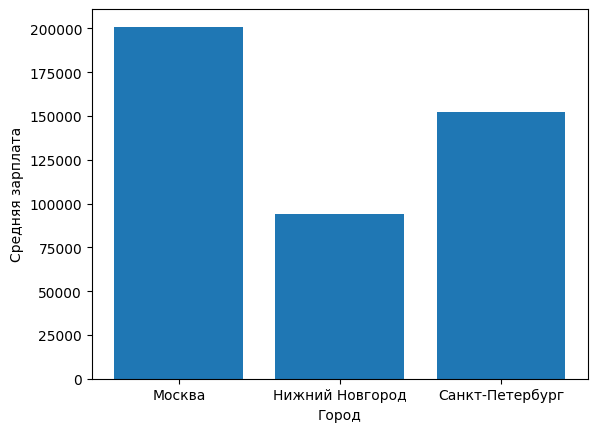

In [224]:
plt.bar(hh_base.groupby(['city'])['numeric_salary'].mean().keys(), hh_base.groupby(['city'])['numeric_salary'].mean().values)
plt.xlabel('Город')
plt.ylabel('Средняя зарплата')
plt.show()